# Lab 12

This week, we are going to focus on the process of supervised learning. Specifically, our goals today are:

0. Understand the role of each phase
1. Compare and contrast training and testing
2. Discuss how to select training and testing data



### Imports for Today

Today we are working with a new data. We begin as usual, importing the packages and data that we need. Do **not** plot the data. You can peek at the top of the data using `head()`.

In [1]:
## Import block
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
from numpy import linalg as LA
import pandas as pd

import random 

from sklearn import linear_model

In [2]:
## Functions for later use

def compute_mse(truth_vec, predict_vec):
    return np.mean((truth_vec - predict_vec)**2)


In [ ]:
# For function testing 




In [3]:
## Import Data

mystery_data = pd.read_csv("lab12data.csv", sep = ",")
mystery_np = np.genfromtxt("lab12data.csv", delimiter=',', skip_header=1)


# DO NOT PLOT ANYTHING! 

### Notes on the Mystery data

The mystery data is laid out with the output values `mysty` in the first column. This output depends on `myst` (which is the second column) in some polynomial fashion, ie. $mysty = b_0 + b_1\cdot myst + b_2\cdot myst^2 + b_3\cdot myst^3 + ...$. To assist our investigation, there are 9 "input" variables denoted `myst#` where the number refers to the number of powers `myst` has been raised to. Concretely `myst2` = `myst`$^2$.

### Supervised Learning - Where are we? 

So far our journey with supervised learning, we've seen the process of _training_ our algorithms and _testing_ our trained algorithms. We've discussed the differences between parameters and hyperparameters, and how to use gradient descent to set parameters. 

In all our discussions, we have carefully side-stepped the _**why**_ behind the two phases in supervised learning. Today aims to confront these _whys_ directly.

## Machine learning - Broad Goal

The goal of any machine learning algorithm is to uncover some underlying truth about our data. For example, consider our student information dataset. We might want to know does average amount of sleep relate or impact one's GPA? To answer this question, we have (fake) data from a number of students that are individual glimpses into the **true** relationship between average amount of sleep and a person's GPA. In an imperfect metaphor, just as a doctor can witness a person's symptoms for an unknown illness, we can view the data that we have as the "symptoms" for the true relationship that we cannot see. 

Our broad goal in machine learning is to find the _true relationship_ for our data based on the data that we have. The idea is that if we find the true relationship, then we can accurately predict, classify, and cluster any new data (or symptoms or examples) that we are given. 

The process of supervised learning divides this goal into the two pieces. First the train phase works to find something close to the true relationship and the test phase gives a notion of how well the output of the train phase would do on new data. In other words, the test phase gives us a notion of how close our guess (from the training phase) is to the true relationship. 

## Dividing for Train and Test

In order to implement a supervised learning algorithm, we have to divide the available data into _train_ and _test_ data. In this section, we will investigate this division using our the numpy import of our `mystery_np` data. 

Noting that our mystery data has 300 data points, we begin with a small training set of 15 randomly selected data points. We then put the rest in the test set. 

In [4]:
random.seed(2022)

# Number of data points
n_data = mystery_np.shape[0]

# Splitting into train and test, with 15 points in the training set
train_inds = random.sample(list(range(n_data)),15)
train_data = mystery_np[train_inds,:]

test_inds = list(set(range(n_data)).difference(set(train_inds)))
test_data = mystery_np[test_inds,:]

Plot these points and make a guess of how `mysty` is constructed from `myst`.

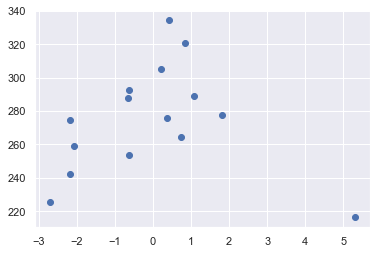

In [5]:
plt.scatter(train_data[:,1],train_data[:,0])

### Testing all the possible polynomials

We have been told that `mysty` and `myst` have a polynomial relationship and our broad goal is to uncover the true polynomial relationship. To do this, we will build polynomials of degrees 1 through 10. For each one, we will plot the resulting function, and compute the training error and test error.

Since we know that `mysty` and `myst` have a polynomial relationship, and given our layout of our data, we can actually just use linear regression in `sklearn` to output various polynomial relationships. Below is an example of this process for a 2-degree polynomial, ie $mysty = b_0 + b_1\cdot myst + b_2\cdot myst^2$.

I've done the first two, but with your group divide and conquer the rest of this part. 

In [6]:
# General x-values for fitting and plotting
x = np.linspace(np.min(train_data[:,1])-0.1, np.max(train_data[:,1])+0.1, 1000)
x = np.array([x]).T

x_mat = np.hstack([x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10])

The training error is 1003.315  and the testing error is 1810.262


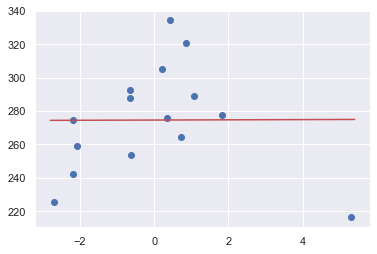

In [7]:
# Degree 1

# Note weirdness with due to the one-d arrayness here!

# Create polynomial
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(train_data[:,1].reshape(-1, 1),train_data[:,0])

# Create plot of training data with the polynomial
plt.scatter(train_data[:,1].reshape(-1, 1),train_data[:,0])

preds1 = model1.predict(x_mat[:,:1].reshape(-1, 1))
plt.plot(x_mat[:,0],preds1, c="r")

# Compute the training error
train_preds1 = model1.predict(train_data[:,1].reshape(-1, 1))
train_error1 = compute_mse(train_preds1, train_data[:,0].reshape(-1, 1))

# Compute the testing error
test_preds1 = model1.predict(test_data[:,1].reshape(-1, 1))
test_error1 = compute_mse(test_preds1, test_data[:,0].reshape(-1, 1))

print("The training error is", round(train_error1,3),
     " and the testing error is", round(test_error1,3))

The training error is 385.586  and the testing error is 979.503


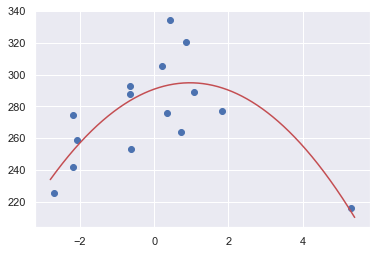

In [8]:
# Degree 2

# Create polynomial
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(train_data[:,1:3],train_data[:,0])

# Create plot of training data with the polynomial 
plt.scatter(train_data[:,1],train_data[:,0])

preds2 = model2.predict(x_mat[:,:2])
plt.plot(x_mat[:,0],preds2, c="r")

# Compute the training error
train_preds2 = model2.predict(train_data[:,1:3])
train_error2 = compute_mse(train_preds2, train_data[:,0])

# Compute the testing error
test_preds2 = model2.predict(test_data[:,1:3])
test_error2 = compute_mse(test_preds2, test_data[:,0])

print("The training error is", round(train_error2,3), 
      " and the testing error is", round(test_error2,3))

The training error is 378.164  and the testing error is 1020.924


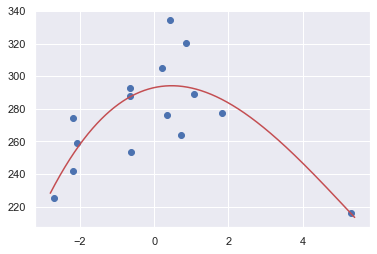

In [12]:
# Degree 3 

# Create polynomial
lm3 = linear_model.LinearRegression()
model3 = lm3.fit(train_data[:,1:4],train_data[:,0])

# Create plot of training data with the polynomial 
plt.scatter(train_data[:,1],train_data[:,0])

preds3 = model3.predict(x_mat[:,:3])
plt.plot(x_mat[:,0],preds3, c="r")

# Compute the training error
train_preds3 = model3.predict(train_data[:,1:4])
train_error3 = compute_mse(train_preds3, train_data[:,0])

# Compute the testing error
test_preds3 = model3.predict(test_data[:,1:4])
test_error3 = compute_mse(test_preds3, test_data[:,0])

print("The training error is", round(train_error3,3), 
      " and the testing error is", round(test_error3,3))

The training error is 376.331  and the testing error is 1135.372


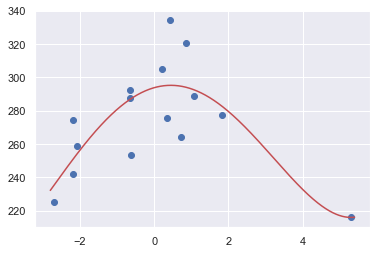

In [14]:
# Degree 4 

# Create polynomial
lm4 = linear_model.LinearRegression()
model4 = lm4.fit(train_data[:,1:5],train_data[:,0])

# Create plot of training data with the polynomial 
plt.scatter(train_data[:,1],train_data[:,0])

preds4 = model4.predict(x_mat[:,:4])
plt.plot(x_mat[:,0],preds4, c="r")

# Compute the training error
train_preds4 = model4.predict(train_data[:,1:5])
train_error4 = compute_mse(train_preds4, train_data[:,0])

# Compute the testing error
test_preds4 = model4.predict(test_data[:,1:5])
test_error4 = compute_mse(test_preds4, test_data[:,0])

print("The training error is", round(train_error4,3), 
      " and the testing error is", round(test_error4,3))

The training error is 347.163  and the testing error is 71508.034


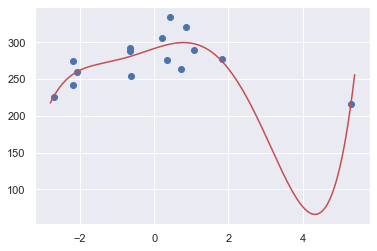

In [17]:
# Degree 5 

# Create polynomial
lm5 = linear_model.LinearRegression()
model5 = lm5.fit(train_data[:,1:6],train_data[:,0])

# Create plot of training data with the polynomial 
plt.scatter(train_data[:,1],train_data[:,0])

preds5 = model5.predict(x_mat[:,:5])
plt.plot(x_mat[:,0],preds5, c="r")

# Compute the training error
train_preds5 = model5.predict(train_data[:,1:6])
train_error5 = compute_mse(train_preds5, train_data[:,0])

# Compute the testing error
test_preds5 = model5.predict(test_data[:,1:6])
test_error5 = compute_mse(test_preds5, test_data[:,0])

print("The training error is", round(train_error5,3), 
      " and the testing error is", round(test_error5,3))

The training error is 335.323  and the testing error is 2335012.392


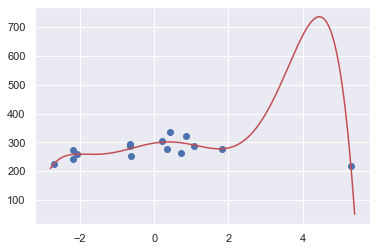

In [18]:
# Degree 6

# Create polynomial
lm6 = linear_model.LinearRegression()
model6 = lm6.fit(train_data[:,1:7],train_data[:,0])

# Create plot of training data with the polynomial 
plt.scatter(train_data[:,1],train_data[:,0])

preds6 = model6.predict(x_mat[:,:6])
plt.plot(x_mat[:,0],preds6, c="r")

# Compute the training error
train_preds6 = model6.predict(train_data[:,1:7])
train_error6 = compute_mse(train_preds6, train_data[:,0])

# Compute the testing error
test_preds6 = model6.predict(test_data[:,1:7])
test_error6 = compute_mse(test_preds6, test_data[:,0])

print("The training error is", round(train_error6,3), 
      " and the testing error is", round(test_error6,3))

The training error is 335.028  and the testing error is 17544399.246


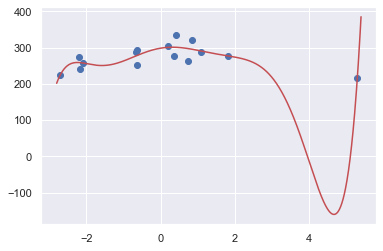

In [20]:
# Degree 7

# Create polynomial
lm7 = linear_model.LinearRegression()
model7 = lm2.fit(train_data[:,1:8],train_data[:,0])

# Create plot of training data with the polynomial 
plt.scatter(train_data[:,1],train_data[:,0])

preds7 = model7.predict(x_mat[:,:7])
plt.plot(x_mat[:,0],preds7, c="r")

# Compute the training error
train_preds7 = model7.predict(train_data[:,1:8])
train_error7 = compute_mse(train_preds7, train_data[:,0])

# Compute the testing error
test_preds7 = model7.predict(test_data[:,1:8])
test_error7 = compute_mse(test_preds7, test_data[:,0])

print("The training error is", round(train_error7,3), 
      " and the testing error is", round(test_error7,3))

In [ ]:
# Degree 8 

In [ ]:
# Degree 9 

In [ ]:
# Degree 10 

#### What is the "right" one?

Based on these plots, which one is the "right" polynomial? 

Chat with your group about which one "looks" like the right one to you.

**Class Vote** mostly 2, with some 3 and 4 advocates

### Underfitting and Overfitting

There are two terms concerning fit that often used _underfitting_ and _overfitting_. Before we define those, let's plot the training errors and the testing errors both against the number of degrees. After the plot, write down a few things that you notice about this plot: 

In [21]:
# Collate the training and testing errors 
# Hint: You can do this directly by just creating a list with the variable names

train_errors = [train_error1,train_error2,train_error3,
                train_error4,train_error5,train_error6,
               train_error7]
test_errors = [test_error1,test_error2,test_error3,
                test_error4,test_error5,test_error6,
               test_error7]

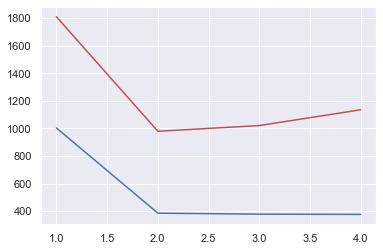

In [26]:
# Plotting training and testing errors

plt.plot(list(range(1,5)), train_errors[:4], c="b")
plt.plot(list(range(1,5)), test_errors[:4], c="r")

(Notes about the plot here!)
*  
*  
*  

**Underfitting** happens when we have not adequately fit our model to the training data. This happens when our training error is high. 

**Overfitting** happens when we have fit our model to perfectly to the training data and have made it less useful for making predictions to new data. This happens when the training error is low and the testing error is high. 

Underfitting and overfitting have to do with the _Bias/Variance trade off._ Our models are attempting to explain some generalization about our data and the underlying mechanics of the data. We want our model to be a good summary of the data in that it explains enough of the data's variations without being too sensitive to that particular data. 
* Every simplication of data will have _bias;_ the more simplistic the model, the more _bias_. 
* Every model also has _variance;_ the more complicated the model, the slightest change in the data will cause huge changes in the model.  

For an imperfect metaphor, say you want to buy a new blazer for work. You buy one in town. It's generic to a person of your approximate size and shape. There is _bias_ in creating this garmet to fit as many people as possible. You have the jacket tailored to your specific body. Now your friend wants to borrow it. You are both about the same size, but she says the jacket doesn't fit her. This is because it is overfit to you. In order for it to fit her, you will have to have it retailored and possibly many measurements will change. This is because the model of a jacket (with its many specific lengths and measurements) has high _variance._

Our goal in building models is to find a balance between bias and variance, which we exemplify as trying to minimize **both** training and testing errors. To achieve this balance, we want to have as much training and testing data as possible.

### Proportion of Train and Test

In our first exploration today of train and test, we used about 5% of the data for the training data and the rest for testing. 

Now we will repeat parts of these experiments with 50-50 train/test split and a 95-5 train/test split, that is 50% of the data in train and then 95% of our data in train, respectively. We will make a make a training and testing error plot for each split and compare your results. 

_Note:_ Due to the coding oddities for degree one polynomial, we will skip that one. 

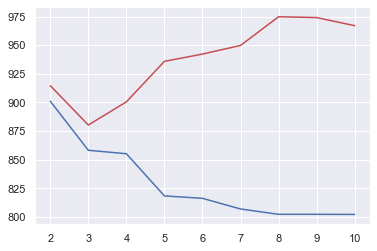

In [28]:
## 50-50 train/test split
random.seed(2022)

n_data = mystery_np.shape[0]

# Initialize lists to store the train and test errors
train_errors = []
test_errors = []

# Split for train and test
n_train = round(0.5*n_data)

train_inds = random.sample(list(range(n_data)),n_train)
train_data = mystery_np[train_inds,:]

test_inds = list(set(range(n_data)).difference(set(train_inds)))
test_data = mystery_np[test_inds,:]

# Loop over polynomials with degree 2 through 10: 
for p in range(2,11):
    lm = linear_model.LinearRegression()
    model = lm.fit(train_data[:,1:(p+1)],train_data[:,0])

    # Compute the training error and add to list of training errors
    train_preds = model.predict(train_data[:,1:(p+1)])
    train_error_p = compute_mse(train_preds, train_data[:,0])
    train_errors.append(train_error_p)

    # Compute the training error and add to list of testing errors
    test_preds = model.predict(test_data[:,1:(p+1)])
    test_error_p = compute_mse(test_preds, test_data[:,0])
    test_errors.append(test_error_p)

# Plot your errors against the degree of the polynomials
plt.plot(list(range(2,11)), train_errors, c="b")
plt.plot(list(range(2,11)), test_errors, c="r")   

In [ ]:
## 95-5 train/test split
n_data = mystery_np.shape[0]

# Initialize lists to store the train and test errors
train_errors = []
test_errors = []

# Split for train and test
n_train = 

train_inds = 
train_data = 

test_inds = 
test_data = 

# Loop over polynomials with degree 2 through 10: 
for p in range(2,11):
    lm = linear_model.LinearRegression()
    model = lm.fit(???,???)

    # Compute the training error and add to list of training errors
    train_preds = model.predict(train_data[:,1:p])
    train_error_p = compute_mse(train_preds, train_data[:,0])
    train_errors.append(train_error_p)

    # Compute the training error and add to list of testing errors
    test_preds = 
    test_error_p = 
    test_errors

# Plot your errors against the degree of the polynomials


Now given these two experiments, what degree of polynomial do you think is best? 

### Next time

Next time, we will continue exploring dividing our data into train and test and how the process of **cross-validation** helps us choose the "right" shape for our models. In this example the shape of our model is given by the degree of the polynomial. Cross-validation can help us figure out what degree is most appropriate for 

### Final Thoughts

To finish up this lab, post your second two training and testing plots and state what you think the right balance of training and testing data is. In other words, what percentage of your data should be in training? Justify your answer in context of the goals for the training and testing phases. Share your plots in a post on **#lab-12-submission** channel on slack with your answer. 

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab12**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources consulted 

0. [Random selection in python](https://pynative.com/python-random-choice/)
1. [Setting random seed](https://pynative.com/python-random-seed/)
2. [Set difference](https://www.geeksforgeeks.org/python-set-difference/)